In [1]:
import numpy as np
from typing import List, Optional, Dict, Set, Callable, Any, Literal
from joblib import Memory, Parallel, delayed
import tslearn
import tslearn.metrics
from tslearn.datasets import UCR_UEA_datasets

from experiments.cross_validation import cv_tslearn, print_cv_results
from experiments.eval_on_test import validate_tslearn, print_test_results
from experiments.utils import join_dicts_from_pickle_paths, save_to_pickle, print_latex_results

# Cross Validation on Train

In [2]:
cv_results = cv_tslearn(
    dataset_names = [
        # 'Epilepsy',                    # N_corpus = 34
        'EthanolConcentration',        # N_corpus = 65
        # 'FingerMovements',             # N_corpus = 158
        # 'HandMovementDirection',       # N_corpus = 40
        # 'Heartbeat',                   # N_corpus = 102
        # 'LSST',                        # N_corpus = 176
        # 'MotorImagery',                # N_corpus = 139
        'NATOPS',                      # N_corpus = 30
        # 'PenDigits',                   # N_corpus = 749
        # 'PEMS-SF',                     # N_corpus = 38
        # 'PhonemeSpectra',              # N_corpus = 85
        # 'RacketSports',                # N_corpus = 38
        # 'SelfRegulationSCP1',          # N_corpus = 134
        ],
    kernel_names = [
            # "flat linear",
            "flat rbf",
            "flat poly",

            # "integral rbf",
            # "integral poly",

            # "trunc sig linear",
            # "trunc sig rbf",

            # "pde sig rbf",

            # "gak", #normalized only

            # "reservoir",
        ],
        k_folds=3,
        n_repeats=1,
        verbose=False,
        )

Dataset: EthanolConcentration
Number of Classes: 4
Dimension of path: 3
Length: 1751
Train: 261
Test: N/A


Label for flat rbf: 100%|██████████| 4/4 [08:19<00:00, 124.87s/it]


Time taken for kernel flat rbf: 499.47446727752686 seconds


Label for flat poly: 100%|██████████| 4/4 [09:29<00:00, 142.48s/it]


Time taken for kernel flat poly: 569.9252274036407 seconds
Time taken for dataset EthanolConcentration: 1069.4032399654388 seconds



Dataset: NATOPS
Number of Classes: 6
Dimension of path: 24
Length: 51
Train: 180
Test: N/A


Label for flat rbf: 100%|██████████| 6/6 [08:09<00:00, 81.58s/it]


Time taken for kernel flat rbf: 489.5100507736206 seconds


Label for flat poly: 100%|██████████| 6/6 [06:46<00:00, 67.77s/it]

Time taken for kernel flat poly: 406.61015129089355 seconds
Time taken for dataset NATOPS: 896.1228325366974 seconds





In [3]:
print_cv_results(cv_results)
save_to_pickle(cv_results, "Data/cv_dummy.pkl")

Cross Validation Results
Number of Classes: 4
Dimension of path: 3
Length: 1751
Train: 261
Test: N/A

conf_results

flat rbf
final_score_avgs 1.0345068328068965
alphas_score_avgs [1.033 1.033 1.033 1.034]
thresh_score_avgs [0.982 0.982 0.982 0.982 0.982 0.982 0.982 0.982 1.006 0.954 0.981 0.906
 0.93  0.932 0.939 0.929 0.923 0.925 0.96  0.943]
E35
{'basepoint': 'T_visibility', 'time': 'time_enhance', 'sigma': 0.7165313105737893, 'normalize': True, 'threshold': 0.02144839925588929, 'alpha': 0.01, 'CV_time': 499.47446727752686}
E38
{'basepoint': 'T_visibility', 'time': 'time_enhance', 'sigma': 0.1353352832366127, 'normalize': True, 'threshold': 20.085536923187668, 'alpha': 0.0, 'CV_time': 499.47446727752686}
E40
{'basepoint': 'T_visibility', 'time': '', 'sigma': 3.7936678946831783, 'normalize': True, 'threshold': 20.085536923187668, 'alpha': 0.0, 'CV_time': 499.47446727752686}
E45
{'basepoint': 'T_visibility', 'time': '', 'sigma': 0.7165313105737893, 'normalize': True, 'threshold': 0.084

# Validate on Test

In [ ]:
test_results = validate_tslearn(cv_results, verbose=False)

In [ ]:
print_test_results(test_results)

# Read CV data from file and print results

In [ ]:
# Load the cross validation results
cv_results = join_dicts_from_pickle_paths(
    [
    "Data/cv_Epilepsy.pkl",
    "Data/cv_EthanolConcentration.pkl",
    "Data/cv_FingerMovements.pkl",
    "Data/cv_HandMovementDirection.pkl",
    "Data/cv_Heartbeat.pkl",
    "Data/cv_LSST.pkl",
    "Data/cv_MotorImagery.pkl",
    "Data/cv_NATOPS.pkl",
    "Data/cv_PEMS-SF.pkl",
    "Data/cv_PhonemeSpectra.pkl",
    "Data/cv_RacketSports.pkl",
    "Data/cv_SelfRegulationSCP1.pkl",
    ])
print_cv_results(cv_results)

In [ ]:
test_results = join_dicts_from_pickle_paths([
                                "Data/results_shorts.pkl",
                                "Data/results_longs.pkl",
                                             ])

test_results = {d:k for d,k in test_results.items() 
                # if d in ["EthanolConcentration",  #datasets with corpus size > 50
                #         "FingerMovements",
                #         "Heartbeat",
                #         "LSST",
                #         "MotorImagery",
                #         "PenDigits",
                #         "PhonemeSpectra",
                #         "SelfRegulationSCP1",]
                }

In [ ]:
print_latex_results(test_results, round_digits=2)
print_latex_results(test_results, round_digits=3)

## Enumerate all UCR UEA datasets in 'tslearn'

In [ ]:
UCR_UEA_datasets = UCR_UEA_datasets()

for dataset_name in UCR_UEA_datasets.list_multivariate_datasets():
#for dataset_name in _datasets:
    print("Dataset:", dataset_name)
    dataset = UCR_UEA_datasets.load_dataset(dataset_name)
    if dataset[0] is not None:
        X_train, y_train, X_test, y_test = dataset
        num_classes = len(np.unique(y_train))
        N_train, T, d = X_train.shape
        N_test, _, _  = X_test.shape
        
        print("Number of Classes:", num_classes)
        print("Dimension of path:", d)
        print("Length:", T)
        print("Train Size, Test Size", N_train, N_test)
        print()
    else:
        print("No dataset found")
        print()

# Print distribution of CV params

In [73]:
import matplotlib.pyplot as plt

all_datasets = [
    "Epilepsy",
    "EthanolConcentration",
    "FingerMovements",
    "HandMovementDirection",
    "Heartbeat",
    "LSST",
    "MotorImagery",
    "NATOPS",
    "PEMS-SF",
    "PhonemeSpectra",
    "RacketSports",
    "SelfRegulationSCP1",
    "SelfRegulationSCP2",
    ]

all_kernels = [
    "flat linear",
    "flat rbf",
    "flat poly",
    "integral rbf",
    "integral poly",
    "trunc sig linear",
    "trunc sig rbf",
    "pde sig rbf",
    "gak",
    "reservoir",
    ]


def plot_cv_params_single_kernel(
        cv_results:Dict,
        param_name:str = "sigma", 
        kernel_name:str = "flat rbf", 
        datasets:Optional[List[str]] = None, 
        n_bins:int = 30,
    ):
    """
    For each dataset, plot the histogram of the best parameter
    values specified by 'param_name' for the kerenl "kernel_name".
    """
    if datasets is None:
        datasets = list(cv_results.keys())

    l = []
    for dataset_name, results in cv_results.items():
        for anomaly_method in ["conf_results", "mahal_results"]:
            kernelwise_dict = results[anomaly_method]
            for ker, labelwise_dict in kernelwise_dict.items():
                for label, param_dict in labelwise_dict.items():
                    if ker == kernel_name:
                        l.append(param_dict[param_name])
    l = np.array(l)
    l.sort()
    l = l.astype(str)

    plt.hist(l, n_bins)
    plt.xlabel(param_name)
    plt.ylabel("Frequency")
    plt.title(f"Kernel: {kernel_name}")
    plt.xticks(rotation='vertical')
    plt.show()



def plot_cv_params_all_kernels(
        cv_results:Dict,
        param_name:str = "sigma",
        kernels:Optional[List[str]] = None, 
        datasets:Optional[List[str]] = None,
        n_bins:int = 30,
    ):
    """
    For each dataset, plot the histogram of the best parameter
    values specified by 'param_name' for all the kernels.
    """
    if datasets is None:
        datasets = list(cv_results.keys())
    if kernels is None:
        kernels = list(cv_results[datasets[0]]["conf_results"].keys())

    l = []
    for dataset_name, results in cv_results.items():
        for anomaly_method in ["conf_results", "mahal_results"]:
            kernelwise_dict = results[anomaly_method]
            for kernel_name, labelwise_dict in kernelwise_dict.items():
                for label, param_dict in labelwise_dict.items():
                    if kernel_name == kernel_name:
                        if param_name in param_dict:
                            l.append(param_dict[param_name])
    l = np.array(l)
    l.sort()
    l = l.astype(str)

    plt.hist(l, n_bins)
    plt.xlabel(param_name)
    plt.ylabel("Frequency")
    plt.title(f"All datasets: {param_name}")
    plt.xticks(rotation='vertical')
    plt.show()

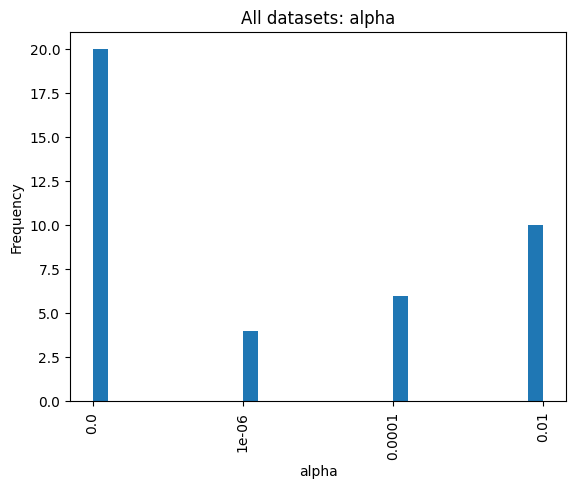

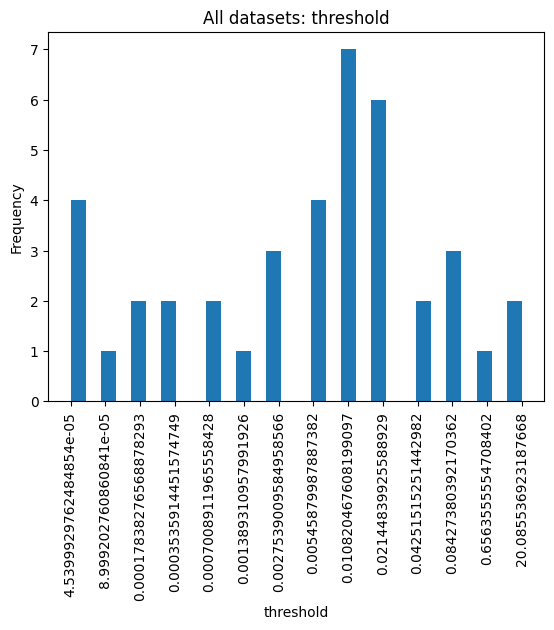

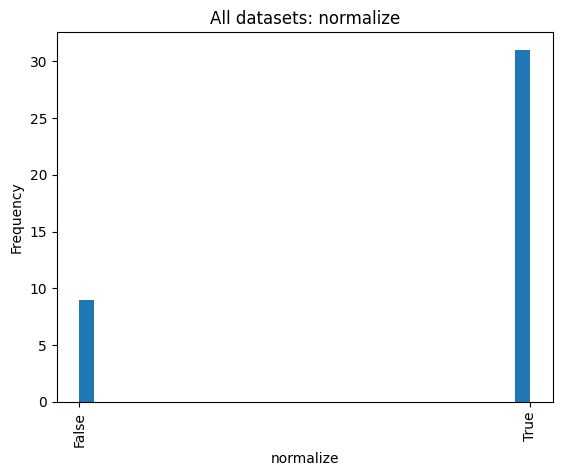

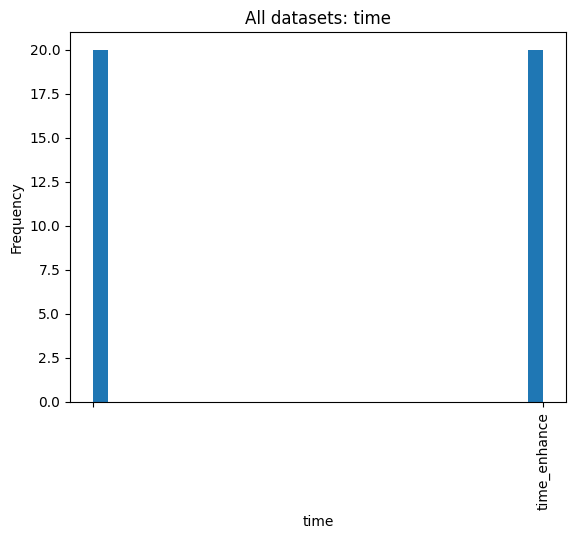

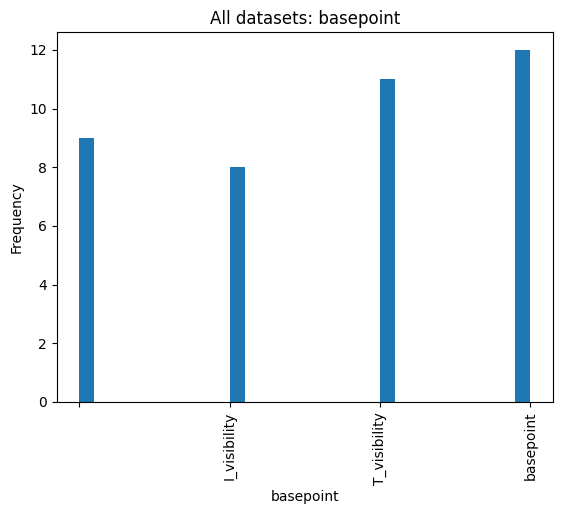

In [71]:
plot_cv_params_all_kernels(cv_results, "alpha")
plot_cv_params_all_kernels(cv_results, "threshold")
plot_cv_params_all_kernels(cv_results, "normalize")
plot_cv_params_all_kernels(cv_results, "time")
plot_cv_params_all_kernels(cv_results, "basepoint")

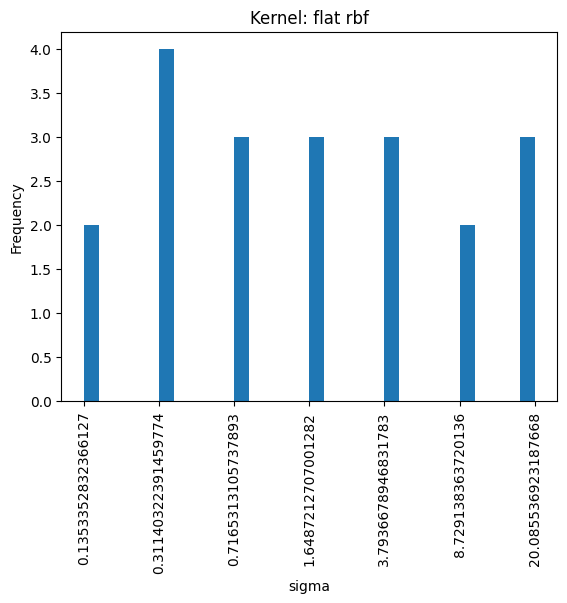

In [74]:
plot_cv_params_single_kernel(cv_results, "sigma", "flat rbf")